## installing and loading relevant packages

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

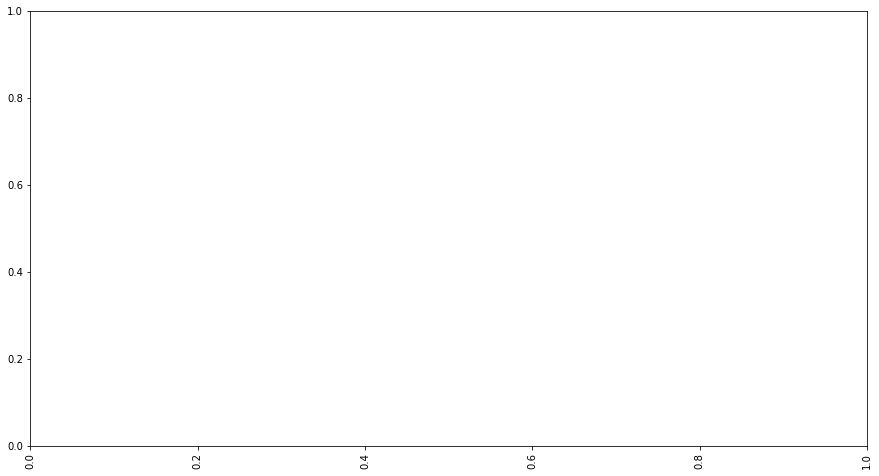

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)

## Loading the data set loan.csv

In [123]:
loan_df = pd.read_csv("C:/Users/Anup/LendingClubCaseStudy/loan.csv")

In [124]:
loan_df1 = pd.read_csv("C:/Users/Anup/LendingClubCaseStudy/loan.csv")

### checking whether the file is loaded successfully or not

In [125]:
print(pd.DataFrame.equals(loan_df, loan_df1))

True


## Understanding the data set

In [200]:
print (loan_df.shape)

(39717, 26)


In [ ]:
loan_df.info

In [204]:
features_with_na=[features for features in loan_df.columns if loan_df[features].isnull().sum()>1]

In [206]:
for feature in features_with_na:
    print(feature, np.round(loan_df[feature].isnull().mean(),4),'%missing values')

funded_amnt_inv 0.0032 %missing values
emp_length 0.0271 %missing values
dti 0.0046 %missing values
revol_bal 0.025 %missing values
revol_util 0.0013 %missing values
total_pymnt 0.0004 %missing values
total_pymnt_inv 0.0042 %missing values
total_rec_prncp 0.0019 %missing values
total_rec_int 0.0018 %missing values
last_pymnt_amnt 0.0019 %missing values


## Data Cleaning

### Removing columns holding NA values in all rows


In [126]:
loan_df = loan_df.dropna(axis='columns', how='all')

### Finding if there are columns where only one value is present in all the rows 

In [127]:
df_onevalue = loan_df.columns[loan_df.eq(loan_df.iloc[0]).all()].tolist()
print (df_onevalue)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


### Removing rows where there is only one value is present in all the rows. Outcome from the previous query

In [128]:
del loan_df["pymnt_plan"]
del loan_df["initial_list_status"]
del loan_df["policy_code"]
del loan_df["application_type"]
del loan_df["acc_now_delinq"]
del loan_df["delinq_amnt"]

### Removing rows where there is same numeric value or NA is present in all the rows. Outcome from the previous query

In [129]:
nunique = loan_df.nunique()

In [130]:
cols_to_drop = nunique[nunique == 1].index

In [131]:
print (cols_to_drop)

Index(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], dtype='object')


In [132]:
loan_df = loan_df.drop(cols_to_drop, axis=1)

### Removing columns having unique Ids, url etc.
### id,member_id,emp_title,url,desc,title,zip_code

In [133]:
del loan_df["id"]
del loan_df["member_id"]
del loan_df["emp_title"]
del loan_df["url"]
del loan_df["desc"]
del loan_df["title"]
del loan_df["zip_code"]

### Based on the business case, removing all date columns except loan issue date as they are not relevant
### "earliest_cr_line","last_pymnt_d","next_pymnt_d","last_credit_pull_d"

In [134]:
del loan_df["earliest_cr_line"]
del loan_df["last_pymnt_d"]
del loan_df["last_credit_pull_d"]

### #removing columns with more than 60% of blanks or 0s

In [135]:
loan_df = loan_df.replace([0,' ','NULL'],np.nan)

In [136]:
loan_df = loan_df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

 ## Data Corrections and Manipulations

### removing the '%' symbol in the interest and revol_util columns

In [137]:
loan_df.int_rate = loan_df.int_rate.str.replace('%', '')

In [138]:
loan_df.revol_util = loan_df.revol_util.str.replace('%', '')

### converting issue_date to date format by appending '01' and converting to date format

In [139]:
loan_df['issue_d'] = '01-' + loan_df['issue_d'].astype(str)

### rounding of values in the decimal fields for only relevant columns

In [192]:
def float_convert(string_to_convert): 
    return float(string_to_convert)
    
loan_df['int_rate'] = loan_df['int_rate'].apply(float_convert)

In [196]:
loan_df['annual_inc'] = loan_df['annual_inc'].apply(np.ceil)
loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].apply(np.ceil)
loan_df['last_pymnt_amnt'] = loan_df['last_pymnt_amnt'].apply(np.ceil)
loan_df['int_rate'] = loan_df['int_rate'].apply(np.ceil)
loan_df['total_pymnt'] = loan_df['total_pymnt'].apply(np.ceil)
loan_df['total_pymnt_inv'] = loan_df['total_pymnt_inv'].apply(np.ceil)
loan_df['total_rec_int'] = loan_df['total_rec_int'].apply(np.ceil)
loan_df['total_rec_prncp'] = loan_df['total_rec_prncp'].apply(np.ceil)

In [197]:
print (loan_df['int_rate'])

0        11.0
1        16.0
2        16.0
3        14.0
4        13.0
         ... 
39712     9.0
39713    11.0
39714     9.0
39715     8.0
39716    14.0
Name: int_rate, Length: 39717, dtype: float64


In [198]:
loan_df.to_csv('my_output_file2.csv')

In [199]:
print (loan_df.shape)

(39717, 26)


## Derrived Feature Analysis

### derrived matrix for the annual income

In [208]:
loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379376e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [213]:
loan_df['bin_annual_inc'] = pd.cut(loan_df['annual_inc'], [0, 40000, 50000, 70000, 80000, 9999999999999999], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


In [214]:
loan_df['bin_annual_inc'].describe()

count         39717
unique            5
top       Very High
freq          10371
Name: bin_annual_inc, dtype: object

In [215]:
print (loan_df['bin_annual_inc'])

0         Very Low
1         Very Low
2         Very Low
3              Low
4             High
           ...    
39712    Very High
39713     Very Low
39714    Very High
39715    Very High
39716     Very Low
Name: bin_annual_inc, Length: 39717, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']


### derrived matrix for the interest rate

In [217]:
loan_df['int_rate'].describe()

count    39717.000000
mean        12.431075
std          3.765493
min          6.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         25.000000
Name: int_rate, dtype: float64

In [218]:
loan_df['bin_int_rate'] = pd.cut(loan_df['int_rate'], [0, 10, 11, 13, 15, 9999999999999999], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


### derrived matrix for the loan amount

In [220]:
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [232]:
loan_df['bin_loan_amnt'] = pd.cut(loan_df['loan_amnt'], [0, 5500, 8000, 12000, 15000, 9999999999999999], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

### derrived matrix for the installment

In [219]:
loan_df['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [221]:
loan_df['bin_installment'] = pd.cut(loan_df['installment'], [0, 168, 230, 330, 430, 9999999999999999], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

## Plotting and Inference Gathering

### Annual Income vs. Loan Payment Status - Plot

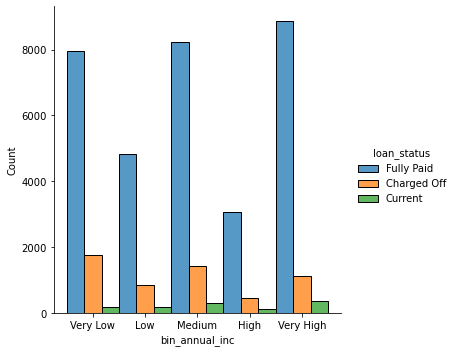

In [244]:
sns.displot(loan_df, x="bin_annual_inc", hue="loan_status", multiple="dodge")

### Loan Status vs. Interest Rate - Plot

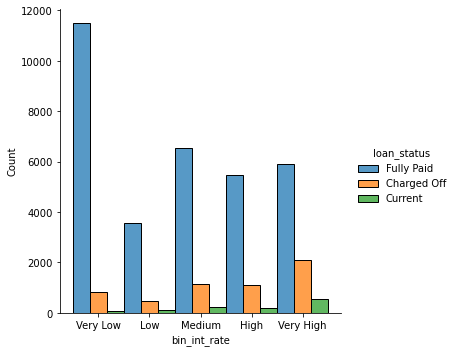

In [230]:
sns.displot(loan_df, x="bin_int_rate", hue="loan_status", multiple="dodge")

### Loan Status vs. Loan Amount - Plot

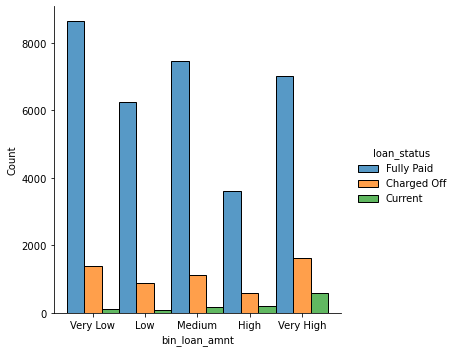

In [233]:
sns.displot(loan_df, x="bin_loan_amnt", hue="loan_status", multiple="dodge")

### Loan Status vs. Instalment Amount - Plot

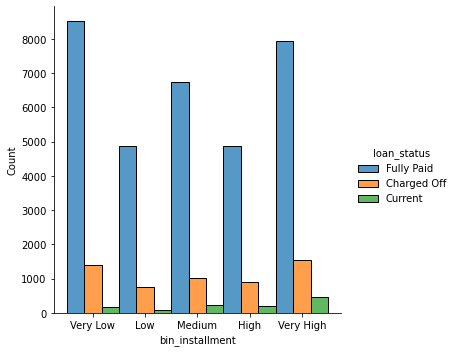

In [234]:
sns.displot(loan_df, x="bin_installment", hue="loan_status", multiple="dodge")

### Loan Status vs. Verification Status - Plot

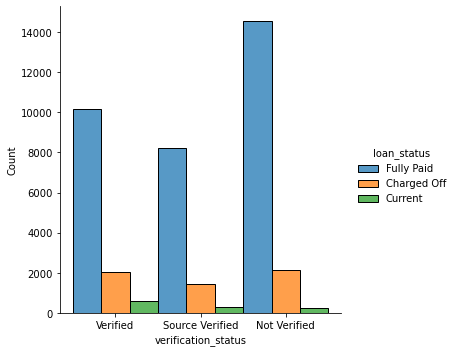

In [236]:
sns.displot(loan_df, x="verification_status", hue="loan_status", multiple="dodge")

### Loan Status vs. Purpose - Plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

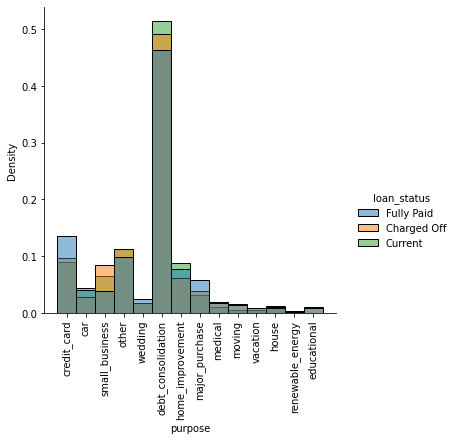

In [260]:
sns.displot(loan_df, x="purpose", hue="loan_status", stat="density",common_norm=False)
plt.xticks(rotation=90)

### Loan Status vs. Grade - Plot

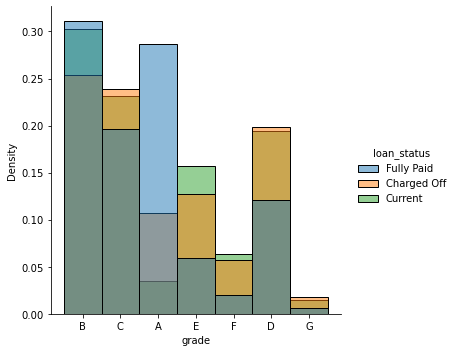

In [265]:
sns.displot(loan_df, x="grade", hue="loan_status", stat="density",common_norm=False)

In [222]:
loan_df.to_csv('my_output_file3.csv')